In [32]:
import os
import glob
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

In [33]:
params = {}
table_name = "estimation_info.csv"

for folder_name in glob.glob(str(Path("../artifacts/*"))):
    if os.path.isdir(folder_name):
        params[os.path.basename(folder_name)] = {}
        df = pd.read_csv(str(Path(folder_name, table_name)))
        params[os.path.basename(folder_name)] = df.to_dict('list')

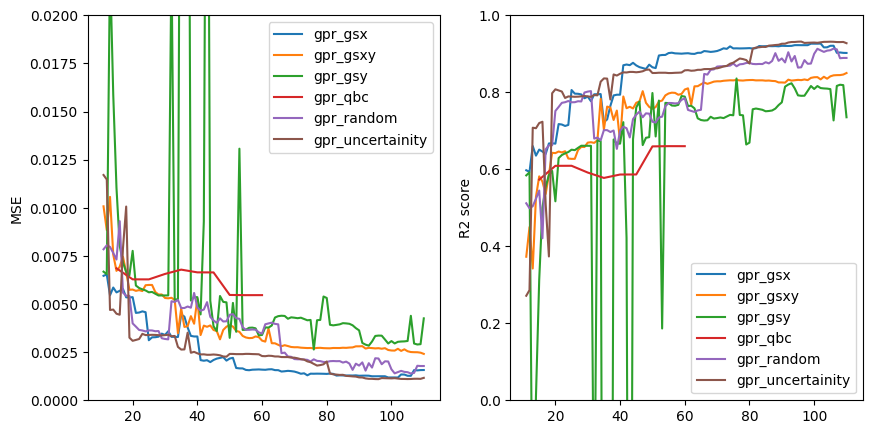

In [66]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(5)

for type, metrics in params.items():
    axs[1].plot(metrics['n_points'], metrics['r2'], label=type)
    axs[0].plot(metrics['n_points'], metrics['mse'], label=type)
axs[0].legend()
axs[0].set_ylim(0.0, 0.02)
axs[0].set_ylabel("MSE")
axs[1].legend()
axs[1].set_ylim(0.0, 1.0)
axs[1].set_ylabel("R2 score")
plt.show()

